Import Library

In [1]:
from math import floor
import edward as ed
import numpy as np
import pandas as pd
import tensorflow as tf
from edward.models import Normal, Categorical
import sys 
import os
sys.path.append(os.path.abspath("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/fix/preprocessing_data"))
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer,StandardScaler
from tqdm import tqdm
from preprocessing_data import preprocessingData_toDBN
from preprocessing_data import preprocessingData_onehotencoder
#from preprocessing_data import preprocessingData_onehotencoder

Using TensorFlow backend.


Call Data

In [2]:
world_cup_2014 = pd.read_csv("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/data_train/data_full_train_2018.csv", delimiter= ',')
independent_data_train,dependent_data_train= preprocessingData_toDBN(world_cup_2014) 


Imputing row 1/2240 with 0 missing, elapsed time: 1.063
Imputing row 101/2240 with 0 missing, elapsed time: 1.063
Imputing row 201/2240 with 0 missing, elapsed time: 1.078
Imputing row 301/2240 with 0 missing, elapsed time: 1.078
Imputing row 401/2240 with 0 missing, elapsed time: 1.078
Imputing row 501/2240 with 0 missing, elapsed time: 1.094
Imputing row 601/2240 with 0 missing, elapsed time: 1.094
Imputing row 701/2240 with 0 missing, elapsed time: 1.094
Imputing row 801/2240 with 0 missing, elapsed time: 1.094
Imputing row 901/2240 with 0 missing, elapsed time: 1.109
Imputing row 1001/2240 with 0 missing, elapsed time: 1.125
Imputing row 1101/2240 with 0 missing, elapsed time: 1.125
Imputing row 1201/2240 with 0 missing, elapsed time: 1.125
Imputing row 1301/2240 with 0 missing, elapsed time: 1.141
Imputing row 1401/2240 with 0 missing, elapsed time: 1.141
Imputing row 1501/2240 with 9 missing, elapsed time: 1.172
Imputing row 1601/2240 with 9 missing, elapsed time: 1.188
Imputing 

C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
scaler = StandardScaler()
train_size = independent_data_train.values.shape[0]
#data train
independent_data_train['THFP'] = scaler.fit_transform(independent_data_train['THFP'].values.reshape([train_size,-1]))
independent_data_train['HTRF'] = scaler.fit_transform(independent_data_train['HTRF'].values.reshape([train_size,-1]))
independent_data_train['TAFP'] = scaler.fit_transform(independent_data_train['TAFP'].values.reshape([train_size,-1]))
independent_data_train['ATRF'] = scaler.fit_transform(independent_data_train['ATRF'].values.reshape([train_size,-1]))
independent_data_train['PHAAR'] = scaler.fit_transform(independent_data_train['PHAAR'].values.reshape([train_size,-1]))
independent_data_train['PAAAR'] = scaler.fit_transform(independent_data_train['PAAAR'].values.reshape([train_size,-1]))

independent_data_train

,home_team,away_team,home_score,away_score,HTRF,THFP,PHPAR,PHSPAR,PHPSAR,PHDAR,...,PHAAR,ATRF,TAFP,PAPAR,PASPAR,PAPSAR,PADAR,PATSA,PADBAR,PAAAR
0,Greece,Korea Republic,1,1,-0.171645,-1.148866,73.0,66.0,79.0,62.0,...,0.493867,1.954923,-0.122130,72.0,67.0,78.0,62.0,77.0,73.0,-0.445067
1,Nigeria,Ghana,1,0,0.696922,-0.839556,70.0,64.0,80.0,61.0,...,-0.887234,0.060284,-0.964316,71.0,66.0,80.0,63.0,81.0,74.0,-0.911585
2,Cameroon,Ivory Coast,1,1,2.202437,-0.530246,69.0,64.0,81.0,63.0,...,-0.426867,-0.284196,-0.964316,72.0,65.0,80.0,62.0,80.0,73.0,0.021452
3,Nigeria,Ivory Coast,0,1,0.696922,-0.839556,70.0,64.0,80.0,61.0,...,-0.887234,-0.284196,-0.964316,72.0,65.0,80.0,62.0,80.0,73.0,0.021452
4,USA,Japan,3,2,0.581113,-0.066281,70.0,66.0,80.0,62.0,...,0.033500,1.265963,-0.683587,72.0,66.0,74.0,63.0,73.0,72.0,0.021452
5,Costa Rica,Korea Republic,1,0,-0.461168,-0.994211,66.0,60.0,76.0,57.0,...,0.033500,1.954923,-0.122130,72.0,67.0,78.0,62.0,77.0,73.0,-0.445067
6,Mexico,Korea Republic,0,1,0.175781,0.706995,71.0,64.0,75.0,62.0,...,0.033500,1.954923,-0.122130,72.0,67.0,78.0,62.0,77.0,73.0,-0.445067
7,Bosnia-Herzegovina,Japan,2,2,-0.287454,-1.458176,73.0,66.0,79.0,61.0,...,0.033500,1.265963,-0.683587,72.0,66.0,74.0,63.0,73.0,72.0,0.021452
8,England,Uruguay,2,1,-0.634881,0.552340,75.0,68.0,81.0,64.0,...,-0.426867,-0.915742,0.298964,72.0,66.0,80.0,65.0,77.0,74.0,0.487970
9,Iran,Costa Rica,3,2,1.623393,-0.994211,67.0,60.0,75.0,58.0,...,0.493867,-0.513849,-0.823951,66.0,60.0,76.0,57.0,74.0,67.0,0.021452


In [4]:
data_y=preprocessingData_onehotencoder(dependent_data_train)
data_x=independent_data_train.iloc[:,[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values

In [5]:
def prepare_train_test_data(data_x, data_y):
    train_size = 0.8
    train_cnt = floor(data_x.shape[0] * train_size)

    train_x, test_x = data_x[0:train_cnt], data_x[train_cnt:]
    train_y, test_y = data_y[0:train_cnt], data_y[train_cnt:]

    train_y2 = np.argmax(train_y, axis=1)
    test_y2 = np.argmax(test_y, axis=1)

    return train_x, test_x, train_y2, test_y2, train_cnt


def neural_network(x_, w1, w2, w3, wout, b1, b2, b3, bout):
    l1 = tf.sigmoid(tf.matmul(x_, w1) + b1)
    # l1 = tf.nn.dropout(l1, keep_prob)

    l2 = tf.sigmoid(tf.matmul(l1, w2) + b2)
    # l2 = tf.nn.dropout(l2, keep_prob)

    l3 = tf.sigmoid(tf.matmul(l2, w3) + b3)
    # l3 = tf.nn.dropout(l3, keep_prob)

    l_out = tf.matmul(l3, wout) + bout

    return l_out


def build_bayesian_network(x_, y_, in_size, out_size):
    n_nodes_hl1 = 100
    n_nodes_hl2 = 100
    n_nodes_hl3 = 100

    w_h1 = Normal(loc=tf.zeros([in_size, n_nodes_hl1]),
                  scale=tf.ones([in_size, n_nodes_hl1]))
    w_h2 = Normal(loc=tf.zeros([n_nodes_hl1, n_nodes_hl2]),
                  scale=tf.ones([n_nodes_hl1, n_nodes_hl2]))
    w_h3 = Normal(loc=tf.zeros([n_nodes_hl2, n_nodes_hl3]),
                  scale=tf.ones([n_nodes_hl2, n_nodes_hl3]))
    w_hout = Normal(loc=tf.zeros([n_nodes_hl3, out_size]),
                    scale=tf.ones([n_nodes_hl3, out_size]))
    b_h1 = Normal(loc=tf.zeros([n_nodes_hl1]),
                  scale=tf.ones([n_nodes_hl1]))
    b_h2 = Normal(loc=tf.zeros([n_nodes_hl2]),
                  scale=tf.ones([n_nodes_hl2]))
    b_h3 = Normal(loc=tf.zeros([n_nodes_hl3]),
                  scale=tf.ones([n_nodes_hl3]))
    b_hout = Normal(loc=tf.zeros([out_size]),
                    scale=tf.ones([out_size]))

    y_pre = Categorical(neural_network(x_, w_h1, w_h2, w_h3, w_hout, b_h1, b_h2, b_h3, b_hout))

    qw_h1 = Normal(loc=tf.Variable(tf.random_normal([in_size, n_nodes_hl1])),
                   scale=tf.Variable(tf.random_normal([in_size, n_nodes_hl1])))
    qw_h2 = Normal(loc=tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                   scale=tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])))
    qw_h3 = Normal(loc=tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                   scale=tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])))
    qw_hout = Normal(loc=tf.Variable(tf.random_normal([n_nodes_hl3, out_size])),
                     scale=tf.Variable(tf.random_normal([n_nodes_hl3, out_size])))
    qb_h1 = Normal(loc=tf.Variable(tf.random_normal([n_nodes_hl1])),
                   scale=tf.Variable(tf.random_normal([n_nodes_hl1])))
    qb_h2 = Normal(loc=tf.Variable(tf.random_normal([n_nodes_hl2])),
                   scale=tf.Variable(tf.random_normal([n_nodes_hl2])))
    qb_h3 = Normal(loc=tf.Variable(tf.random_normal([n_nodes_hl3])),
                   scale=tf.Variable(tf.random_normal([n_nodes_hl3])))
    qb_hout = Normal(loc=tf.Variable(tf.random_normal([out_size])),
                     scale=tf.Variable(tf.random_normal([out_size])))

    y = Categorical(neural_network(x_, qw_h1, qw_h2, qw_h3, qw_hout, qb_h1, qb_h2, qb_h3, qb_hout))

    inference = ed.KLqp({w_h1: qw_h1, b_h1: qb_h1,
                         w_h2: qw_h2, b_h2: qb_h2,
                         w_h3: qw_h3, b_h3: qb_h3,
                         w_hout: qw_hout, b_hout: qb_hout}, data={y_pre: y_})
    inference.initialize()

    return inference, y_pre, y



Tuning Epoch

In [6]:

pred=[]
accuracy_val=[]
accuracy_train=[]
error_training=[]
error_vald=[]

tr_x=[]
tr_y=[]
val_x=[]
val_y=[]
y_samp=[]
from sklearn import metrics  
epochs=[10,30,50,70,90]
def train_bayesian_network(data_x, data_y, in_size, out_size):
    for a in range(len(epochs)):
        training_epochs = epochs[a]
        batch_size = 1000
        print(training_epochs)
        x_ = tf.placeholder(tf.float32, shape=(None, in_size))
        y_ = tf.placeholder(tf.int32)

        train_x, test_x, train_y2, test_y2, train_cnt = prepare_train_test_data(data_x, data_y)
        tr_x.append(train_x)
        tr_y.append(train_y2)
        val_x.append(test_x)
        val_y.append(test_y2)
        inference, y_pre, y = build_bayesian_network(x_, y_, in_size, out_size)
        sess = tf.Session()
        sess.run(tf.global_variables_initializer())
        with sess:
            samples_num = 100
            for epoch in tqdm(range(training_epochs), file=sys.stdout):
                perm = np.random.permutation(train_cnt)
                for i in range(0, train_cnt, batch_size):
                    batch_x = train_x[perm[i:i + batch_size]]
                    batch_y = train_y2[perm[i:i + batch_size]]
                    inference.update(feed_dict={x_: batch_x, y_: batch_y})

                #train
                y_samples = y.sample(samples_num).eval(feed_dict={x_: train_x})   
                acc = (np.round(y_samples.sum(axis=0) / samples_num) == train_y2).mean()
                predic_train=np.round((y_samples.sum(axis=0) / samples_num) == train_y2)
                accuracy_train.append(acc)
                loss_train=metrics.mean_absolute_error(train_y2, predic_train)
                error_training.append(loss_train)


                #validation
                y_samples = y.sample(samples_num).eval(feed_dict={x_: test_x})
                tets_acc = (np.round(y_samples.sum(axis=0) / samples_num) == test_y2).mean()            
                predic_val=np.round((y_samples.sum(axis=0) / samples_num) == test_y2)            
                pred.append(predic_val)
                accuracy_val.append(tets_acc)
                loss_val=metrics.mean_absolute_error(test_y2, predic_val)
                error_vald.append(loss_val)
                print("epoch: {0};\naccuracy: {1};\nvalidation accuracy: {2}"
                                .format(epoch,acc,tets_acc))
 
#           tqdm.write('epoch:\t{}\taccuracy:\t{}\tvaridation accuracy:\t{}'.format(training_epochs+1, acc, tets_acc))


In [7]:
if __name__ == '__main__':
    in_size = data_x.shape[1]
    out_size = data_y.shape[1]
    data= train_bayesian_network(data_x, data_y, in_size, out_size)


10
  0%|                                                                                           | 0/10 [00:00<?, ?it/s]epoch: 0;
accuracy: 0.5027901785714286;
validation accuracy: 0.37723214285714285
 10%|████████▎                                                                          | 1/10 [00:00<00:05,  1.60it/s]epoch: 1;
accuracy: 0.5027901785714286;
validation accuracy: 0.35714285714285715
 20%|████████████████▌                                                                  | 2/10 [00:00<00:03,  2.33it/s]epoch: 2;
accuracy: 0.24665178571428573;
validation accuracy: 0.35714285714285715
 30%|████████████████████████▉                                                          | 3/10 [00:01<00:02,  2.49it/s]epoch: 3;
accuracy: 0.23549107142857142;
validation accuracy: 0.2611607142857143
 40%|█████████████████████████████████▏                                                 | 4/10 [00:01<00:02,  2.75it/s]epoch: 4;
accuracy: 0.26171875;
validation accuracy: 0.2611607142857143
 50%|

 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [00:22<00:05,  1.80it/s]epoch: 41;
accuracy: 0.23660714285714285;
validation accuracy: 0.35714285714285715
 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [00:23<00:04,  1.79it/s]epoch: 42;
accuracy: 0.26171875;
validation accuracy: 0.38169642857142855
 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:24<00:03,  1.79it/s]epoch: 43;
accuracy: 0.23549107142857142;
validation accuracy: 0.38169642857142855
 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:24<00:03,  1.78it/s]epoch: 44;
accuracy: 0.5027901785714286;
validation accuracy: 0.35714285714285715
 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [00:25<00:02,  1.78it/s]epoch: 45;
accuracy: 0.5027901785714286;
validation accuracy: 0.35714285714285715
 

validation accuracy: 0.2611607142857143
  2%|█▊                                                                                 | 2/90 [00:02<01:28,  1.00s/it]epoch: 2;
accuracy: 0.23549107142857142;
validation accuracy: 0.375
  3%|██▊                                                                                | 3/90 [00:02<01:26,  1.01it/s]epoch: 3;
accuracy: 0.5027901785714286;
validation accuracy: 0.35714285714285715
  4%|███▋                                                                               | 4/90 [00:03<01:24,  1.02it/s]epoch: 4;
accuracy: 0.26171875;
validation accuracy: 0.27232142857142855
  6%|████▌                                                                              | 5/90 [00:04<01:22,  1.03it/s]epoch: 5;
accuracy: 0.5027901785714286;
validation accuracy: 0.38169642857142855
  7%|█████▌                                                                             | 6/90 [00:05<01:21,  1.03it/s]epoch: 6;
accuracy: 0.23549107142857142;
validation accuracy: 

 93%|████████████████████████████████████████████████████████████████████████████▌     | 84/90 [01:38<00:07,  1.17s/it]epoch: 84;
accuracy: 0.26171875;
validation accuracy: 0.31026785714285715
 94%|█████████████████████████████████████████████████████████████████████████████▍    | 85/90 [01:39<00:05,  1.17s/it]epoch: 85;
accuracy: 0.5027901785714286;
validation accuracy: 0.35714285714285715
 96%|██████████████████████████████████████████████████████████████████████████████▎   | 86/90 [01:40<00:04,  1.17s/it]epoch: 86;
accuracy: 0.5027901785714286;
validation accuracy: 0.35714285714285715
 97%|███████████████████████████████████████████████████████████████████████████████▎  | 87/90 [01:41<00:03,  1.17s/it]epoch: 87;
accuracy: 0.5027901785714286;
validation accuracy: 0.35714285714285715
 98%|████████████████████████████████████████████████████████████████████████████████▏ | 88/90 [01:43<00:02,  1.17s/it]epoch: 88;
accuracy: 0.5027901785714286;
validation accuracy: 0.35714285714285715
 99

Tuning Batch Size

In [ ]:

pred=[]
accuracy_val=[]
accuracy_train=[]
error_training=[]
error_vald=[]

tr_x=[]
tr_y=[]
val_x=[]
val_y=[]
y_samp=[]
from sklearn import metrics  
batch_sizes=[1000,3000,5000,7000,9000]
def train_bayesian_network(data_x, data_y, in_size, out_size):
    for b in range(len(batch_sizes)):
        training_epochs = 10
        batch_size = batch_sizes[b]
        print(training_epochs)
        x_ = tf.placeholder(tf.float32, shape=(None, in_size))
        y_ = tf.placeholder(tf.int32)

        train_x, test_x, train_y2, test_y2, train_cnt = prepare_train_test_data(data_x, data_y)
        tr_x.append(train_x)
        tr_y.append(train_y2)
        val_x.append(test_x)
        val_y.append(test_y2)
        inference, y_pre, y = build_bayesian_network(x_, y_, in_size, out_size)
        sess = tf.Session()
        sess.run(tf.global_variables_initializer())
        with sess:
            samples_num = 100
            for epoch in tqdm(range(training_epochs), file=sys.stdout):
                perm = np.random.permutation(train_cnt)
                for i in range(0, train_cnt, batch_size):
                    batch_x = train_x[perm[i:i + batch_size]]
                    batch_y = train_y2[perm[i:i + batch_size]]
                    inference.update(feed_dict={x_: batch_x, y_: batch_y})

                #train
                y_samples = y.sample(samples_num).eval(feed_dict={x_: train_x})   
                acc = (np.round(y_samples.sum(axis=0) / samples_num) == train_y2).mean()
                predic_train=np.round((y_samples.sum(axis=0) / samples_num) == train_y2)
                accuracy_train.append(acc)
                loss_train=metrics.mean_absolute_error(train_y2, predic_train)
                error_training.append(loss_train)


                #validation
                y_samples = y.sample(samples_num).eval(feed_dict={x_: test_x})
                tets_acc = (np.round(y_samples.sum(axis=0) / samples_num) == test_y2).mean()            
                predic_val=np.round((y_samples.sum(axis=0) / samples_num) == test_y2)            
                pred.append(predic_val)
                accuracy_val.append(tets_acc)
                loss_val=metrics.mean_absolute_error(test_y2, predic_val)
                error_vald.append(loss_val)
                print("epoch: {0};\nbatch size:{1} ;\naccuracy: {2};\nvalidation accuracy: {3}"
                                .format(epoch,batch_size,acc,tets_acc))
 
#           tqdm.write('epoch:\t{}\taccuracy:\t{}\tvaridation accuracy:\t{}'.format(training_epochs+1, acc, tets_acc))


In [ ]:
if __name__ == '__main__':
    in_size = data_x.shape[1]
    out_size = data_y.shape[1]
    data= train_bayesian_network(data_x, data_y, in_size, out_size)


10
  0%|                                                                                           | 0/10 [00:00<?, ?it/s]epoch: 0;
batch size:1000 ;
accuracy: 0.26171875;
validation accuracy: 0.38169642857142855
 10%|████████▎                                                                          | 1/10 [00:01<00:13,  1.53s/it]epoch: 1;
batch size:1000 ;
accuracy: 0.5027901785714286;
validation accuracy: 0.38169642857142855
 20%|████████████████▌                                                                  | 2/10 [00:02<00:11,  1.44s/it]epoch: 2;
batch size:1000 ;
accuracy: 0.5027901785714286;
validation accuracy: 0.3861607142857143
 30%|████████████████████████▉                                                          | 3/10 [00:04<00:09,  1.39s/it]epoch: 3;
batch size:1000 ;
accuracy: 0.5027901785714286;
validation accuracy: 0.35714285714285715
 40%|█████████████████████████████████▏                                                 | 4/10 [00:05<00:08,  1.37s/it]epoch: 4;
batch

Tuning Sample Num

In [ ]:

pred=[]
accuracy_val=[]
accuracy_train=[]
error_training=[]
error_vald=[]

tr_x=[]
tr_y=[]
val_x=[]
val_y=[]
y_samp=[]
from sklearn import metrics  
sample_nums=[100,300,500,700,900]
def train_bayesian_network(data_x, data_y, in_size, out_size):
    for c in range(len(sample_nums)):
        training_epochs = 10
        batch_size = 1000
        print(training_epochs)
        x_ = tf.placeholder(tf.float32, shape=(None, in_size))
        y_ = tf.placeholder(tf.int32)

        train_x, test_x, train_y2, test_y2, train_cnt = prepare_train_test_data(data_x, data_y)
        tr_x.append(train_x)
        tr_y.append(train_y2)
        val_x.append(test_x)
        val_y.append(test_y2)
        inference, y_pre, y = build_bayesian_network(x_, y_, in_size, out_size)
        sess = tf.Session()
        sess.run(tf.global_variables_initializer())
        with sess:
            samples_num = sample_nums[c]
            for epoch in tqdm(range(training_epochs), file=sys.stdout):
                perm = np.random.permutation(train_cnt)
                for i in range(0, train_cnt, batch_size):
                    batch_x = train_x[perm[i:i + batch_size]]
                    batch_y = train_y2[perm[i:i + batch_size]]
                    inference.update(feed_dict={x_: batch_x, y_: batch_y})

                #train
                y_samples = y.sample(samples_num).eval(feed_dict={x_: train_x})   
                acc = (np.round(y_samples.sum(axis=0) / samples_num) == train_y2).mean()
                predic_train=np.round((y_samples.sum(axis=0) / samples_num) == train_y2)
                accuracy_train.append(acc)
                loss_train=metrics.mean_absolute_error(train_y2, predic_train)
                error_training.append(loss_train)


                #validation
                y_samples = y.sample(samples_num).eval(feed_dict={x_: test_x})
                tets_acc = (np.round(y_samples.sum(axis=0) / samples_num) == test_y2).mean()            
                predic_val=np.round((y_samples.sum(axis=0) / samples_num) == test_y2)            
                pred.append(predic_val)
                accuracy_val.append(tets_acc)
                loss_val=metrics.mean_absolute_error(test_y2, predic_val)
                error_vald.append(loss_val)
                print("epoch: {0}; \nbatch size:{1} ;\nsumple numps:{2} ;\naccuracy: {2};\nvalidation accuracy: {3}"
                                .format(epoch,batch_size,samples_num,acc,tets_acc))
 
#           tqdm.write('epoch:\t{}\taccuracy:\t{}\tvaridation accuracy:\t{}'.format(training_epochs+1, acc, tets_acc))


In [ ]:
if __name__ == '__main__':
    in_size = data_x.shape[1]
    out_size = data_y.shape[1]
    data= train_bayesian_network(data_x, data_y, in_size, out_size)


Train Accuracy dan validation accuracy

After Tuning

In [6]:

pred=[]
accuracy_val=[]
accuracy_train=[]
error_training=[]
error_vald=[]

tr_x=[]
tr_y=[]
val_x=[]
val_y=[]
y_samp=[]
from sklearn import metrics  
def train_bayesian_network(data_x, data_y, in_size, out_size):
    training_epochs = 10
    batch_size = 1000


    x_ = tf.placeholder(tf.float32, shape=(None, in_size))
    y_ = tf.placeholder(tf.int32)

    train_x, test_x, train_y2, test_y2, train_cnt = prepare_train_test_data(data_x, data_y)
    tr_x.append(train_x)
    tr_y.append(train_y2)
    val_x.append(test_x)
    val_y.append(test_y2)
    inference, y_pre, y = build_bayesian_network(x_, y_, in_size, out_size)
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    with sess:
        samples_num = 100
        for epoch in tqdm(range(training_epochs), file=sys.stdout):
            perm = np.random.permutation(train_cnt)
            for i in range(0, train_cnt, batch_size):
                batch_x = train_x[perm[i:i + batch_size]]
                batch_y = train_y2[perm[i:i + batch_size]]
                inference.update(feed_dict={x_: batch_x, y_: batch_y})
            
            #train
            y_samples = y.sample(samples_num).eval(feed_dict={x_: train_x})   
            acc = (np.round(y_samples.sum(axis=0) / samples_num) == train_y2).mean()
            predic_train=np.round((y_samples.sum(axis=0) / samples_num) == train_y2)
            accuracy_train.append(acc)
            loss_train=metrics.mean_absolute_error(train_y2, predic_train)
            error_training.append(loss_train)
            
            
            #validation
            y_samples = y.sample(samples_num).eval(feed_dict={x_: test_x})
            tets_acc = (np.round(y_samples.sum(axis=0) / samples_num) == test_y2).mean()            
            predic_val=np.round((y_samples.sum(axis=0) / samples_num) == test_y2)            
            pred.append(predic_val)
            accuracy_val.append(tets_acc)
            loss_val=metrics.mean_absolute_error(test_y2, predic_val)
            error_vald.append(loss_val)


            tqdm.write('epoch:\t{}\taccuracy:\t{}\tvaridation accuracy:\t{}'.format(epoch + 1, acc, tets_acc))


In [7]:
if __name__ == '__main__':
    in_size = data_x.shape[1]
    out_size = data_y.shape[1]
    data= train_bayesian_network(data_x, data_y, in_size, out_size)


epoch:	1	accuracy:	0.26171875	varidation accuracy:	0.2611607142857143                                                  
epoch:	2	accuracy:	0.23660714285714285	varidation accuracy:	0.375                                                      
epoch:	3	accuracy:	0.5027901785714286	varidation accuracy:	0.38169642857142855                                         
epoch:	4	accuracy:	0.26171875	varidation accuracy:	0.359375                                                            
epoch:	5	accuracy:	0.5027901785714286	varidation accuracy:	0.35714285714285715                                         
epoch:	6	accuracy:	0.5027901785714286	varidation accuracy:	0.35714285714285715                                         
epoch:	7	accuracy:	0.3208705357142857	varidation accuracy:	0.35714285714285715                                         
epoch:	8	accuracy:	0.5027901785714286	varidation accuracy:	0.2611607142857143                                          
epoch:	9	accuracy:	0.5027901785714286	va

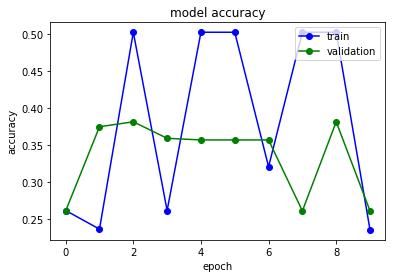

In [19]:
import matplotlib.pyplot as plt
plt.plot(accuracy_train, "o-",color="b",)
plt.plot(accuracy_val, "o-",color="g",)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Train error dan validation error

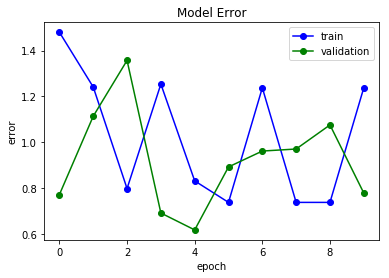

In [20]:
plt.plot(error_training, "o-",color="b",)
plt.plot(error_vald, "o-",color="g",)
plt.title('Model Error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [21]:
accuracy_val

[0.2611607142857143,
 0.375,
 0.38169642857142855,
 0.359375,
 0.35714285714285715,
 0.35714285714285715,
 0.35714285714285715,
 0.2611607142857143,
 0.38169642857142855,
 0.2611607142857143]

In [22]:
hasil_pred=pred.pop(8)


AttributeError: 'numpy.ndarray' object has no attribute 'pop'

In [52]:
val_y

AttributeError: 'numpy.ndarray' object has no attribute 'pop'

In [12]:
hasil_prediksi=[]
pred=hasil_pred
for a in pred:
    if a == 1:
        hasil_prediksi.append("Draw")
    if a==0:
        hasil_prediksi.append("Away Win")
    if a==2 :
        hasil_prediksi.append("Home Win")
                    
        
# a=["a","b","c"]
# b=pred[a]



In [13]:
hasil_prediksi=pd.DataFrame(hasil_prediksi)
hasil_prediksi.to_csv("C:/Users/Wahyu Nainggolan/Desktop/baru/tena.csv")


In [17]:
hasil_prediksi

,0
0,Away Win
1,Away Win
2,Away Win
3,Away Win
4,Away Win
5,Away Win
6,Away Win
7,Away Win
8,Draw
9,Away Win


In [ ]:
from sklearn.metrics import accuracy_score
for i in range (len(pred_model_DNN_Val)):
    maximum = max(pred_model_DNN_Val[i])
    for j in range (len(pred_model_DNN_Val[i])):
        if(pred_model_DNN_Val[i][j]==maximum):
            pred_model_DNN_Val[i][j]=1
        else:
            pred_model_DNN_Val[i][j]=0

In [37]:
val_y = np.array(val_y, dtype=np.float32)
val_y= val_y.reshape([448,1])


In [28]:
a=pd.DataFrame(val_y)
b=pd.DataFrame(hasil_pred)

In [31]:
a

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,2,2,1,2,2,2,2,2,0,2,...,0,0,0,2,1,2,1,1,2,1


In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(val_y, hasil_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(val_y, hasil_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y, hasil_pred)))  

Mean Absolute Error: 1.07589
Mean Squared Error: 1.79018
Root Mean Squared Error: 1.33798


In [40]:
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(val_y, hasil_pred))  

C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        0.0       0.31      0.74      0.44       171
        1.0       0.00      0.00      0.00       117
        2.0       0.00      0.00      0.00       160

avg / total       0.12      0.28      0.17       448



In [45]:
pred=[]
y_validation=[]

In [47]:
for a in val_y:
    if a == 1:
        y_validation.append("Draw")
    if a==0:
        y_validation.append("Away Win")
    if a==2 :
        y_validation.append("Home Win")
                    

In [49]:
print(confusion_matrix(y_validation, hasil_prediksi))  

[[126  45   0]
 [117   0   0]
 [160   0   0]]


In [50]:
accuracy_val

[0.2611607142857143,
 0.375,
 0.38169642857142855,
 0.359375,
 0.35714285714285715,
 0.35714285714285715,
 0.35714285714285715,
 0.2611607142857143,
 0.38169642857142855,
 0.2611607142857143]

In [51]:
error_vald

[0.7723214285714286,
 1.1138392857142858,
 1.3571428571428572,
 0.6919642857142857,
 0.6183035714285714,
 0.8928571428571429,
 0.9620535714285714,
 0.9709821428571429,
 1.0758928571428572,
 0.7790178571428571]